In [1]:
final = []

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/treato.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/bellybandit.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/spain-select.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/persevoyages.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/elixirstrings.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/evenko.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/martinagency.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/valuepetsupplies.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/misstravel.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/unitywater.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/exin.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/backand.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/bellybandit.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/persevoyages.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/brusselstimes.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/val/0765.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/val/0720.png'
file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/val/0734.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/val/0711.png'





# filler = 'new-leaf'
# filler = 'green-leaves'
# filler = 'leaf'
filler = 'fire'
# filler = 'maple'
# filler = 'sakura'
# filler = 'smoke'

In [19]:
a = []
import numpy as np
from PIL import Image
a.append(np.array(Image.open(file_name_to_test).resize((400, 400))))
# a.append(np.array(Image.open('/home/abhirag/cv_project/sorted_dataset/2/' + file_name_to_test.split('/')[-1])))

from PIL import Image
style = '/home/abhirag/cv_project/experiment/data/style/' + filler + '.png'

In [20]:
x = np.array(Image.open(style))

Image.fromarray(x)

if filler == 'leaf':
    x_new = np.array(Image.fromarray(x[:, 480:480+360, :]).resize((400, 400)))
    a.append(x_new)
else:
    x_new = np.array(Image.fromarray(x[-400:, -400:, :]))
    a.append(x_new)

In [21]:



import torch
from PIL import Image
import numpy as np
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()

opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32
# opts.load_GS_name = '/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/maple-GS-iccv.ckpt'

# SketchModule
opts.GB_nlayers = 6
opts.DB_nlayers = 5
opts.GB_nf = 32
opts.DB_nf = 32
opts.load_GB_name = '/home/abhirag/cv_project/experiment/save/experiment12/GB.ckpt4'
opts.load_GB_name = '/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/GB-iccv.ckpt'

# train 
opts.gpu = True
opts.step1_epochs = 30
opts.step2_epochs = 40
opts.step3_epochs = 80
opts.step4_epochs = 10
opts.batchsize = 16
opts.Straining_num = 2560
opts.scale_num = 4
opts.Sanglejitter = True
opts.subimg_size = 256
opts.glyph_preserve = False
opts.text_datasize = 708
opts.text_path = '../data/rawtext/yaheiB/train'

print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
    
    
netShapeM.G_T.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/' + filler + '-GT.ckpt'))
netShapeM.G_S.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/' + filler + '-GS.ckpt'))

# netShapeM.G_T.load_state_dict(torch.load('/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/' + filler + '-GT-iccv.ckpt'))
# netShapeM.G_S.load_state_dict(torch.load('/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/' + filler + '-GS-iccv.ckpt'))


netShapeM.eval()


I = load_image(file_name_to_test)
I = to_var(I)#[:,:,32:288,32:288])

import numpy as np
from PIL import Image
# def track_progress_over_deformation():
#     a = []
for deform in [0, 0.25, 0.5]:#range(11):
    result = netShapeM(I, deform)
#     a.append(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8))
    a.append(np.array(Image.fromarray(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8)).resize((400, 400))))
#     x = np.hstack(tuple(a))
#     return 'done'

# a.append(track_progress_over_deformation())

final.append(np.hstack(tuple(a)))



netShapeM.G_T.load_state_dict(torch.load('/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/' + filler + '-GT-iccv.ckpt'))
netShapeM.G_S.load_state_dict(torch.load('/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/' + filler + '-GS-iccv.ckpt'))


netShapeM.eval()


I = load_image(file_name_to_test)
I = to_var(I)#[:,:,32:288,32:288])

import numpy as np
from PIL import Image
# def track_progress_over_deformation():
a = []

a.append(np.array(Image.open(file_name_to_test).resize((400, 400))))
# a.append(np.array(Image.open('/home/abhirag/cv_project/sorted_dataset/2/' + file_name_to_test.split('/')[-1])))


x = np.array(Image.open(style))


if filler == 'leaf':
    x_new = np.array(Image.fromarray(x[:, 480:480+360, :]).resize((400, 400)))
    a.append(x_new)
else:
    x_new = np.array(Image.fromarray(x[-400:, -400:, :]))
    a.append(x_new)


for deform in [0, 0.25, 0.5]:#range(11):
    result = netShapeM(I, deform)
#     a.append(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8))
    a.append(np.array(Image.fromarray(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8)).resize((400, 400))))
    
final.append(np.hstack(tuple(a)))

--- create model ---


In [22]:
Image.open(style).size

(800, 560)

In [23]:
# Image.fromarray(np.hstack(tuple(a)))#.save('comparison_results/bellybandit_ours.png')

In [24]:
# final.append(np.hstack(tuple(a)))

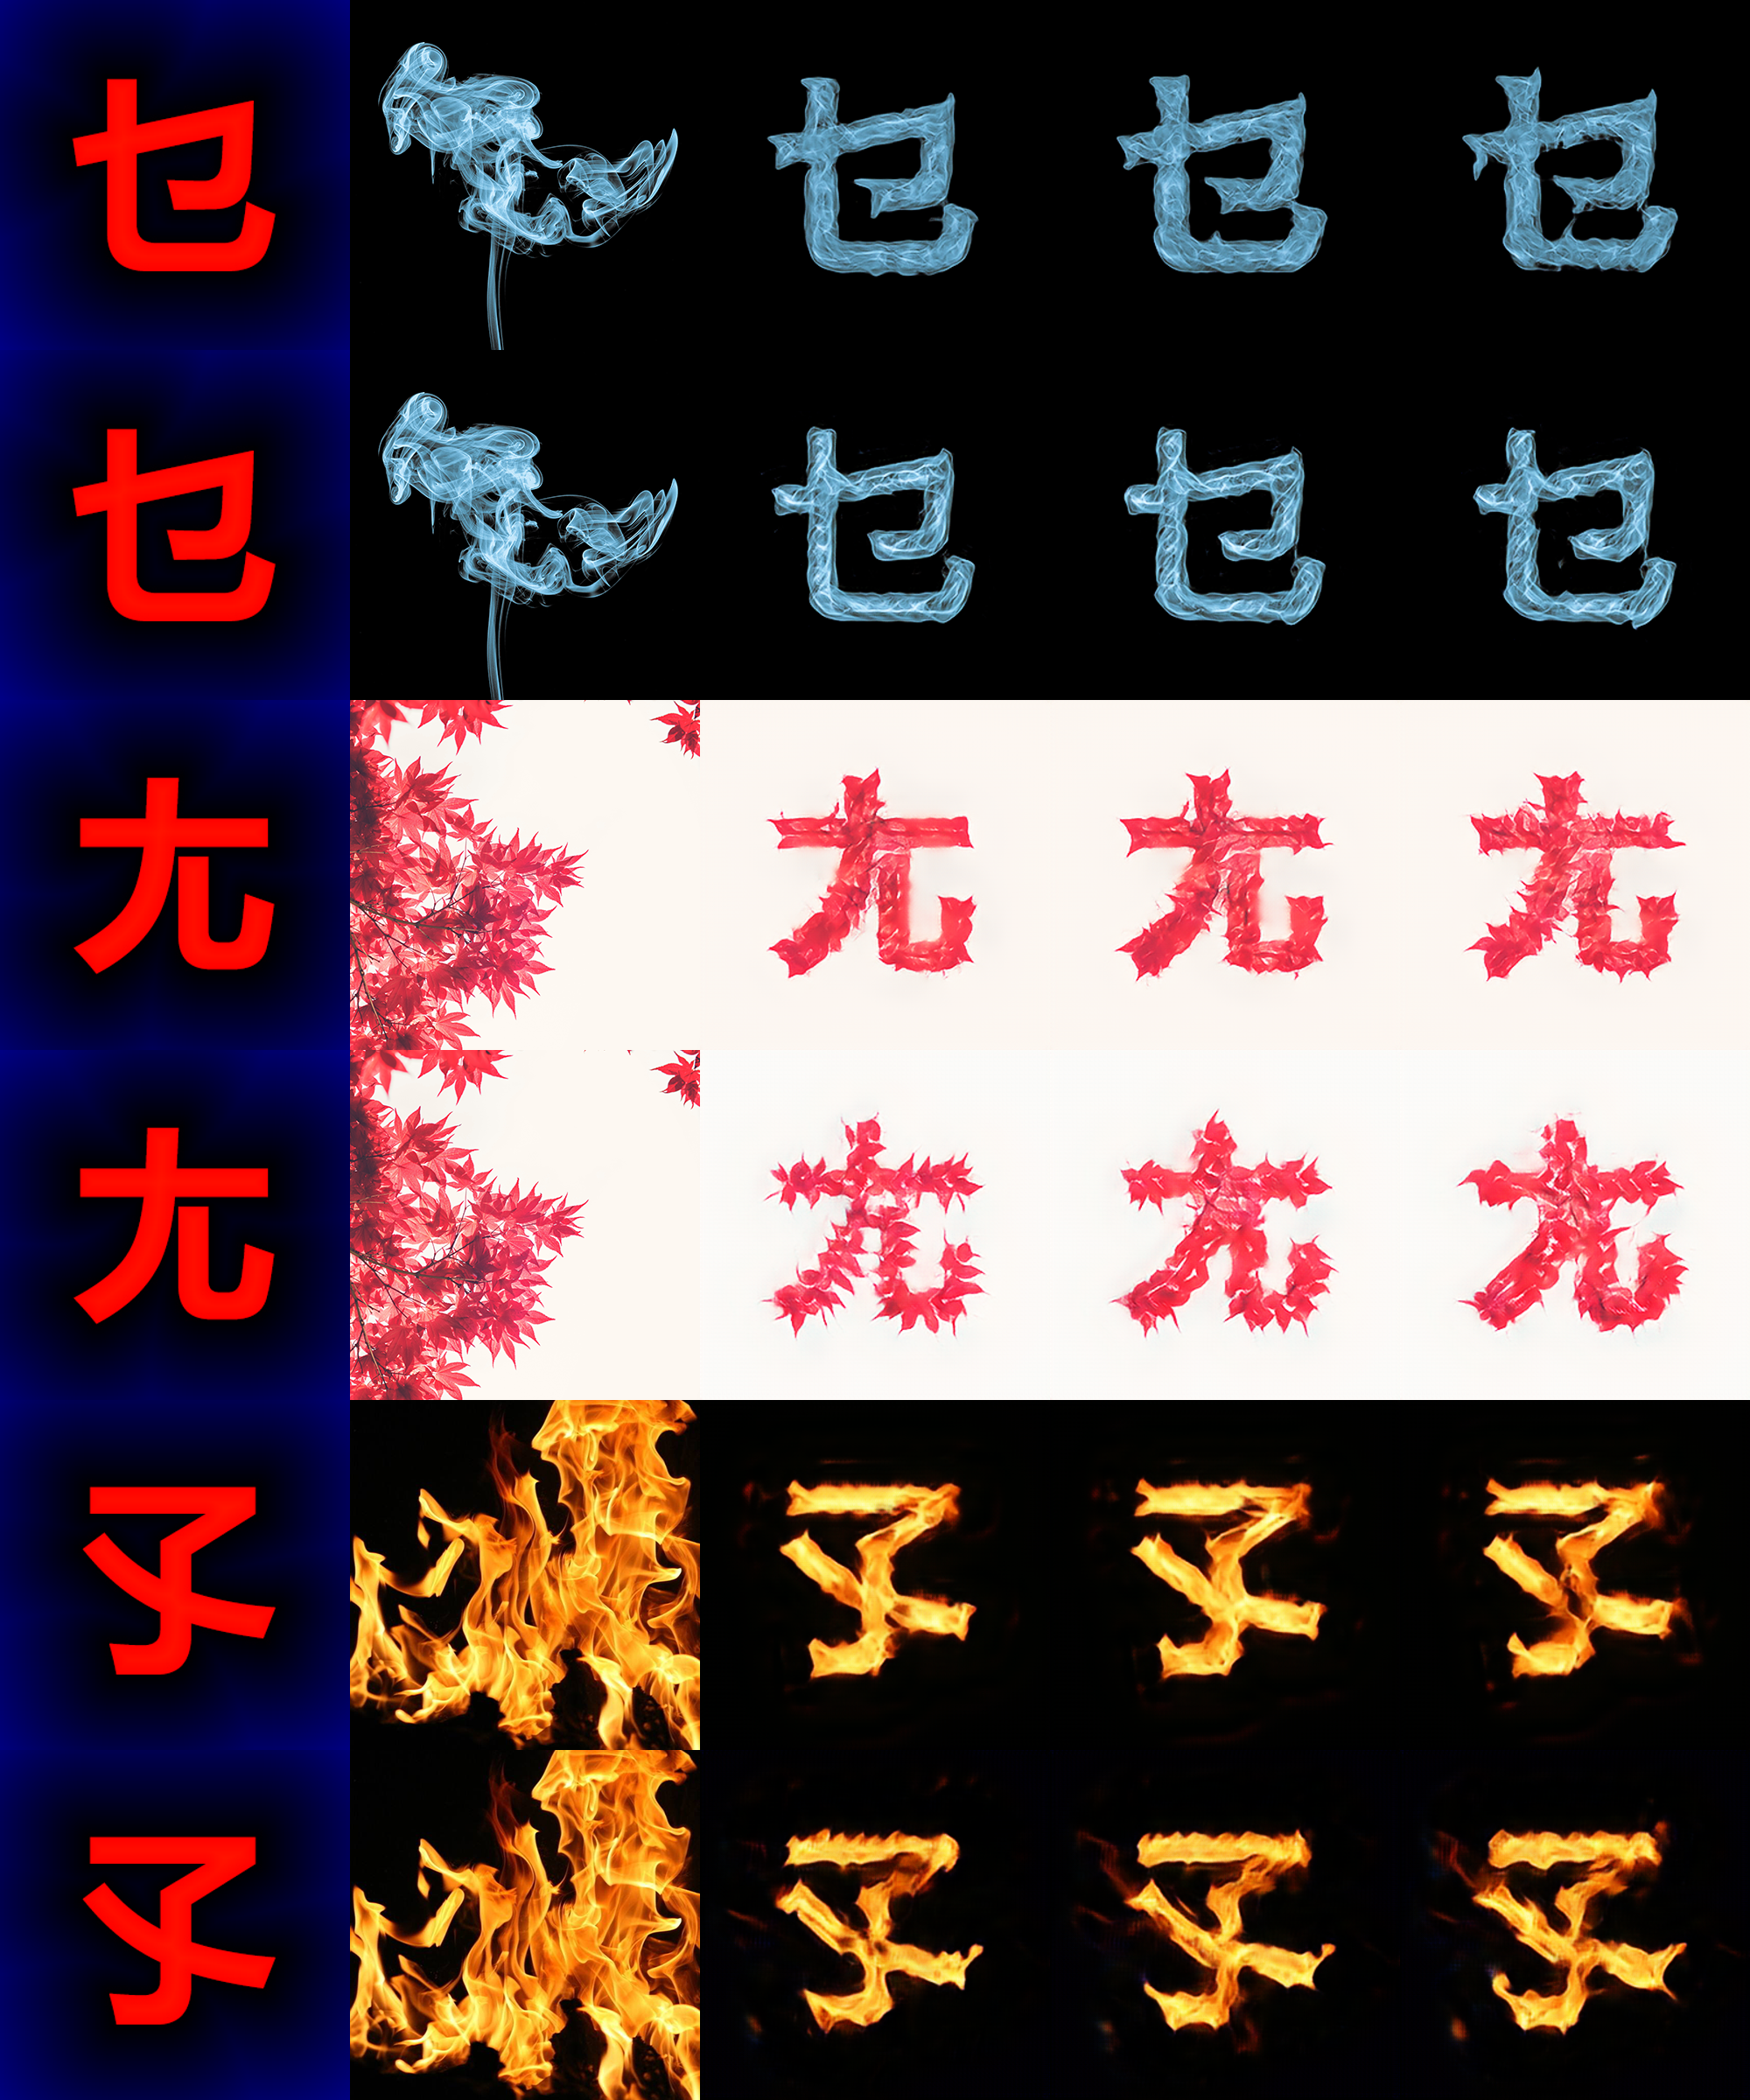

In [27]:
Image.fromarray(np.vstack(tuple(final[:])))#.save('text_images_results.png')

# TO MAKE GIF

In [134]:

filler = 'fire'

file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/misstravel.png'

style = '/home/abhirag/cv_project/experiment/data/style/' + filler + '.png'

netShapeM.G_T.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/' + filler + '-GT.ckpt'))
netShapeM.G_S.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/' + filler + '-GS.ckpt'))
netShapeM.eval()

I = load_image(file_name_to_test)
I = to_var(I)

for deform in range(-10, 11):
    result = netShapeM(I, deform/10)
    Image.fromarray(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8)).save('../gif_pics/img_' + str(deform) + '.png')